In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from scipy import stats
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [2]:
transactionData = pd.read_excel('QVI_transaction_data.xlsx')
transactionData

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264831,43533,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,43325,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,43410,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,43461,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


In [3]:
customerData = pd.read_csv('QVI_purchase_behaviour.csv')
customerData

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream
...,...,...,...
72632,2370651,MIDAGE SINGLES/COUPLES,Mainstream
72633,2370701,YOUNG FAMILIES,Mainstream
72634,2370751,YOUNG FAMILIES,Premium
72635,2370961,OLDER FAMILIES,Budget


# Exploratory data analysis

In [4]:
transactionData.dtypes # helps to get data types of each column
transactionData.info() # used to check the data types and the null counts in columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


In [5]:
customerData.dtypes 
customerData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [6]:
# Convert DATE to datetime format
transactionData["DATE"]=pd.to_datetime(transactionData["DATE"], origin = "1899-12-30",unit="D")
transactionData

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


In [7]:
transactionData['PROD_NAME']

0           Natural Chip        Compny SeaSalt175g
1                         CCs Nacho Cheese    175g
2           Smiths Crinkle Cut  Chips Chicken 170g
3           Smiths Chip Thinly  S/Cream&Onion 175g
4         Kettle Tortilla ChpsHny&Jlpno Chili 150g
                            ...                   
264831     Kettle Sweet Chilli And Sour Cream 175g
264832               Tostitos Splash Of  Lime 175g
264833                    Doritos Mexicana    170g
264834     Doritos Corn Chip Mexican Jalapeno 150g
264835               Tostitos Splash Of  Lime 175g
Name: PROD_NAME, Length: 264836, dtype: object

In [8]:
#see how many unique products we have
transactionData['PROD_NAME'].nunique

<bound method IndexOpsMixin.nunique of 0           Natural Chip        Compny SeaSalt175g
1                         CCs Nacho Cheese    175g
2           Smiths Crinkle Cut  Chips Chicken 170g
3           Smiths Chip Thinly  S/Cream&Onion 175g
4         Kettle Tortilla ChpsHny&Jlpno Chili 150g
                            ...                   
264831     Kettle Sweet Chilli And Sour Cream 175g
264832               Tostitos Splash Of  Lime 175g
264833                    Doritos Mexicana    170g
264834     Doritos Corn Chip Mexican Jalapeno 150g
264835               Tostitos Splash Of  Lime 175g
Name: PROD_NAME, Length: 264836, dtype: object>

In [9]:
#see if the variable contains special character
#As we are only interested in words that will tell us if the product is chips or not
#remove all words with digits and special characters such as '&' from our set of product words
#sort by frequency
transactionData['PROD_NAME'].str.contains('&')

0         False
1         False
2         False
3          True
4          True
          ...  
264831    False
264832    False
264833    False
264834    False
264835    False
Name: PROD_NAME, Length: 264836, dtype: bool

In [10]:
Counter(" ".join(transactionData["PROD_NAME"]).split()).most_common()

[('175g', 60561),
 ('Chips', 49770),
 ('150g', 41633),
 ('Kettle', 41288),
 ('&', 35565),
 ('Smiths', 28860),
 ('Salt', 27976),
 ('Cheese', 27890),
 ('Pringles', 25102),
 ('134g', 25102),
 ('Doritos', 24962),
 ('Crinkle', 23960),
 ('110g', 22387),
 ('Corn', 22063),
 ('Original', 21560),
 ('Cut', 20754),
 ('Chip', 18645),
 ('170g', 18502),
 ('Salsa', 18094),
 ('Chicken', 15407),
 ('165g', 15297),
 ('Sea', 14145),
 ('Thins', 14075),
 ('Sour', 13882),
 ('Crisps', 12607),
 ('330g', 12540),
 ('Vinegar', 12402),
 ('Chilli', 12389),
 ('300g', 12041),
 ('RRD', 11894),
 ('Infuzions', 11057),
 ('Supreme', 10963),
 ('WW', 10320),
 ('Cobs', 9693),
 ('Popd', 9693),
 ('Tortilla', 9580),
 ('Tostitos', 9471),
 ('Twisties', 9454),
 ('Sensations', 9429),
 ('Old', 9324),
 ('El', 9324),
 ('Paso', 9324),
 ('Dip', 9324),
 ('Sweet', 7883),
 ('Lime', 7852),
 ('Tomato', 7669),
 ('Cream', 7618),
 ('Thinly', 7507),
 ('Tyrrells', 6442),
 ('380g', 6418),
 ('And', 6373),
 ('BBQ', 6351),
 ('Tangy', 6332),
 ('Grain',

In [11]:
# remove special character and then sort the distinct words by frequency of occurrence.
freq_df = transactionData.copy()
freq_df["PROD_NAME"] = freq_df["PROD_NAME"].str.replace(r'([0-9]+[gG])','')
freq_df["PROD_NAME"] = freq_df["PROD_NAME"].str.replace(r'([&])','')
freq_df

<ipython-input-11-97a4820baff1>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  freq_df["PROD_NAME"] = freq_df["PROD_NAME"].str.replace(r'([0-9]+[gG])','')
<ipython-input-11-97a4820baff1>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  freq_df["PROD_NAME"] = freq_df["PROD_NAME"].str.replace(r'([&])','')


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/CreamOnion,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHnyJlpno Chili,3,13.8
...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream,2,10.8
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime,1,4.4
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana,2,8.8
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno,2,7.8


In [12]:
# remove salsa products
#transactionData = transactionData[~transactionData["PROD_NAME"].str.contains(r"[Ss]alsa")]
salsa_df = transactionData[transactionData['PROD_NAME'].str.contains('Salsa')].index

In [13]:
transactionData.drop(salsa_df, inplace=True)
transactionData

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


In [14]:
word_count = Counter(" ".join(freq_df["PROD_NAME"]).split()).most_common() #list object

In [15]:
pd.DataFrame.from_records(word_count)

,0,1
0,Chips,49770
1,Kettle,41288
2,Smiths,28860
3,Salt,27976
4,Cheese,27890
...,...,...
188,Frch/Onin,1432
189,Pc,1431
190,NCC,1419
191,Garden,1419


In [16]:
#see if there is any outliers

transactionData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 246742 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            246742 non-null  datetime64[ns]
 1   STORE_NBR       246742 non-null  int64         
 2   LYLTY_CARD_NBR  246742 non-null  int64         
 3   TXN_ID          246742 non-null  int64         
 4   PROD_NBR        246742 non-null  int64         
 5   PROD_NAME       246742 non-null  object        
 6   PROD_QTY        246742 non-null  int64         
 7   TOT_SALES       246742 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 16.9+ MB


In [17]:
transactionData.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,246742.000000,2.467420e+05,2.467420e+05,246742.000000,246742.000000,246742.000000
mean,135.051098,1.355310e+05,1.351311e+05,56.351789,1.908062,7.321322
std,76.787096,8.071528e+04,7.814772e+04,33.695428,0.659831,3.077828
min,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.700000
25%,70.000000,7.001500e+04,6.756925e+04,26.000000,2.000000,5.800000
50%,130.000000,1.303670e+05,1.351830e+05,53.000000,2.000000,7.400000
75%,203.000000,2.030840e+05,2.026538e+05,87.000000,2.000000,8.800000
max,272.000000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


In [18]:
transactionData.describe(include=[object])

,PROD_NAME
count,246742
unique,105
top,Kettle Mozzarella Basil & Pesto 175g
freq,3304


## Find Outlier

### There's an outlier in PROD_QTY since the max is 200

In [19]:
# filter the transaction with PROD_QTY ==200
# There are two transactions where 200 packets of chips are bought in one transaction
# both of these transactions were by the same customer. 
transactionData[transactionData['PROD_QTY']==200]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


In [20]:
# Use a filter to see what other transactions that customer made.
transactionData[transactionData['LYLTY_CARD_NBR']==226000]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


#### The customer only has two transactions!

In [21]:
#remove outlier customer information out of our data

transactionData = transactionData[-(transactionData.LYLTY_CARD_NBR == 226000)]
transactionData

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


In [22]:
# remove this customer from dataframe
transactionData.drop(transactionData[transactionData['PROD_QTY']==200].index, inplace=True)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [23]:
# check data summary again
transactionData.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,246740.000000,2.467400e+05,2.467400e+05,246740.000000,246740.000000,246740.000000
mean,135.050361,1.355303e+05,1.351304e+05,56.352213,1.906456,7.316113
std,76.786971,8.071520e+04,7.814760e+04,33.695235,0.342499,2.474897
min,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.700000
25%,70.000000,7.001500e+04,6.756875e+04,26.000000,2.000000,5.800000
50%,130.000000,1.303670e+05,1.351815e+05,53.000000,2.000000,7.400000
75%,203.000000,2.030832e+05,2.026522e+05,87.000000,2.000000,8.800000
max,272.000000,2.373711e+06,2.415841e+06,114.000000,5.000000,29.500000


In [24]:
# Create a summary of transaction count by date.
tran_date = transactionData.groupby('DATE').count()#.reset_index()
tran_date

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
DATE,,,,,,,
2018-07-01,663,663,663,663,663,663,663
2018-07-02,650,650,650,650,650,650,650
2018-07-03,674,674,674,674,674,674,674
2018-07-04,669,669,669,669,669,669,669
2018-07-05,660,660,660,660,660,660,660
...,...,...,...,...,...,...,...
2019-06-26,657,657,657,657,657,657,657
2019-06-27,669,669,669,669,669,669,669
2019-06-28,673,673,673,673,673,673,673


#### only 364 rows, one day is missing.

In [25]:
#find missing date
pd.date_range(start = '2018-07-01', end = '2019-06-30' ).difference(tran_date.index)

DatetimeIndex(['2018-12-25'], dtype='datetime64[ns]', freq=None)

#### The missing date is 2018-12-25

In [26]:
# join it onto the data to fill in the missing day.
#tran_date.loc['2018-12-25']=np.nan
tran_date.loc['2018-12-25'] = 0

In [27]:
#move back 'DATE' index back to data set and sort by Date.
tran_date = tran_date.reset_index().sort_values('DATE')

In [28]:
#check if DATE label is returned to a variable
tran_date.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 363
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   DATE            365 non-null    datetime64[ns]
 1   STORE_NBR       365 non-null    int64         
 2   LYLTY_CARD_NBR  365 non-null    int64         
 3   TXN_ID          365 non-null    int64         
 4   PROD_NBR        365 non-null    int64         
 5   PROD_NAME       365 non-null    int64         
 6   PROD_QTY        365 non-null    int64         
 7   TOT_SALES       365 non-null    int64         
dtypes: datetime64[ns](1), int64(7)
memory usage: 25.7 KB


<AxesSubplot:xlabel='DATE'>

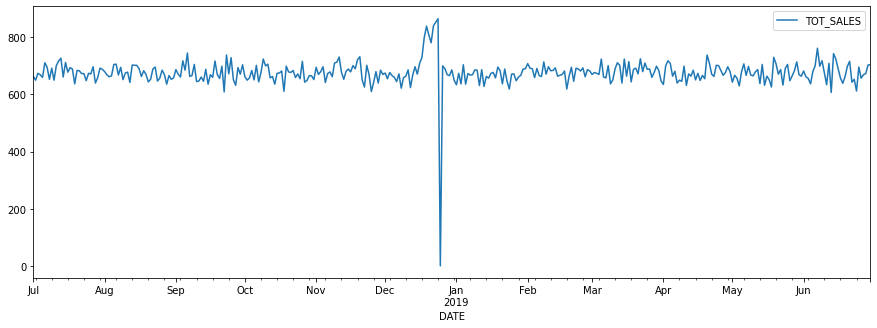

In [29]:
# Plot transactions over time
fig, ax = plt.subplots(figsize=(15,5))
#ax.plot(testDJan.day, testDJan.Sheets, color='tab:orange')
tran_date.plot(x='DATE', y='TOT_SALES', ax=ax)

#### Since Dec has an increase in purchases, we could zoom in it. and due to shops being closed on Christmas day, 12/25 total sale is 0.

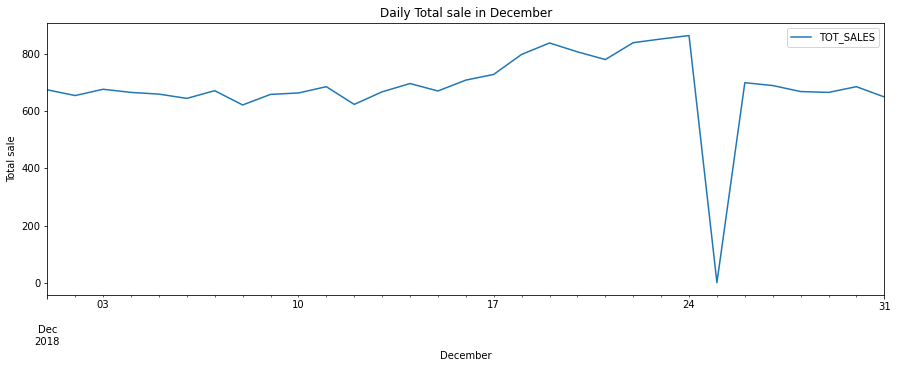

In [30]:
fig, ax = plt.subplots(figsize=(15, 5))

# Add x-axis and y-axis
tran_date.plot(x='DATE', y='TOT_SALES', ax=ax)
# Set title and labels for axes
ax.set(xlabel="December",
       ylabel="Total sale",
       title="Daily Total sale in December",
       xlim=["2018-12-01", "2018-12-31"])
plt.show()

## Create pack size from PROD_NAME and plot.

In [31]:
transactionData

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


In [32]:
# creating features from pack size
transactionData["PROD_NAME"] = transactionData["PROD_NAME"].str.replace(r'[0-9]+(G)','g')
pack_sizes = transactionData["PROD_NAME"].str.extract(r'([0-9]+[gG])')[0].str.replace("g","").astype("float")
pack_sizes.describe()

<ipython-input-32-5f9d05282050>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  transactionData["PROD_NAME"] = transactionData["PROD_NAME"].str.replace(r'[0-9]+(G)','g')
<ipython-input-32-5f9d05282050>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transactionData["PROD_NAME"] = transactionData["PROD_NAME"].str.replace(r'[0-9]+(G)','g')


count    240676.000000
mean        175.302286
std          60.014468
min          70.000000
25%         150.000000
50%         170.000000
75%         175.000000
max         380.000000
Name: 0, dtype: float64

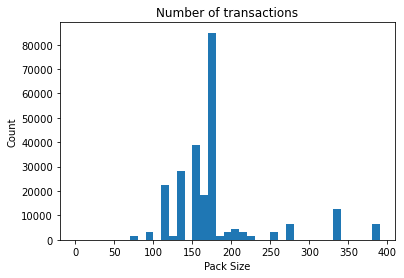

In [33]:
# Plot a histogram showing the number of transactions by pack size
plt.hist(pack_sizes, bins = np.arange(0, 400, 10)) 
plt.title("Number of transactions") 
plt.xlabel('Pack Size')
plt.ylabel('Count')
plt.show()

#### The largest size is 380g and the smallest size is 70g

### Now to create brands, we can use the first word in PROD_NAME to work out the brand name

In [34]:
#Create a column which contains the brand of the product, by extracting it from the product name.
transactionData["PROD_NAME"].str.split().str[0].value_counts().sort_index() # sort by index

Burger         1564
CCs            4551
Cheetos        2927
Cheezels       4603
Cobs           9693
Dorito         3183
Doritos       22041
French         1418
Grain          6272
GrnWves        1468
Infuzions     11057
Infzns         3144
Kettle        41288
NCC            1419
Natural        6050
Pringles      25102
RRD           11894
Red            4427
Smith          2963
Smiths        27390
Snbts          1576
Sunbites       1432
Thins         14075
Tostitos       9471
Twisties       9454
Tyrrells       6442
WW            10320
Woolworths     1516
Name: PROD_NAME, dtype: int64

In [35]:
# check brand names
[col for col in transactionData.PROD_NAME if 'RRD' in col]

['RRD Chilli&         Coconut 150g',
 'RRD Chilli&         Coconut 150g',
 'RRD Sweet Chilli &  Sour Cream 165g',
 'RRD Sweet Chilli &  Sour Cream 165g',
 'RRD Chilli&         Coconut 150g',
 'RRD Chilli&         Coconut 150g',
 'RRD Steak &         Chimuchurri 150g',
 'RRD Honey Soy       Chicken 165g',
 'RRD Salt & Vinegar  165g',
 'RRD Honey Soy       Chicken 165g',
 'RRD Chilli&         Coconut 150g',
 'RRD Sweet Chilli &  Sour Cream 165g',
 'RRD Salt & Vinegar  165g',
 'RRD Lime & Pepper   165g',
 'RRD Chilli&         Coconut 150g',
 'RRD Salt & Vinegar  165g',
 'RRD Salt & Vinegar  165g',
 'RRD SR Slow Rst     Pork Belly 150g',
 'RRD Honey Soy       Chicken 165g',
 'RRD Pc Sea Salt     165g',
 'RRD Steak &         Chimuchurri 150g',
 'RRD Lime & Pepper   165g',
 'RRD Pc Sea Salt     165g',
 'RRD Chilli&         Coconut 150g',
 'RRD Pc Sea Salt     165g',
 'RRD Salt & Vinegar  165g',
 'RRD Honey Soy       Chicken 165g',
 'RRD Sweet Chilli &  Sour Cream 165g',
 'RRD Honey Soy      

## Some of the brand names look like they are of the same brands -
1. Red and RRD (which are both Red Rock Deli chips)
2. Grain and GrnWves
3. Infzns and Infuzions
4. Dorito and Doritos
5. NCC and Natural Chip Co
6. Snbts and Sunbites
7. WW and Woolworths
8. Smith and Smiths

In [36]:
sorted(transactionData.PROD_NAME.unique())

['Burger Rings 220g',
 'CCs Nacho Cheese    175g',
 'CCs Original 175g',
 'CCs Tasty Cheese    175g',
 'Cheetos Chs & Bacon Balls 190g',
 'Cheetos Puffs 165g',
 'Cheezels Cheese 330g',
 'Cheezels Cheese Box 125g',
 'Cobs Popd Sea Salt  Chips 110g',
 'Cobs Popd Sour Crm  &Chives Chips 110g',
 'Cobs Popd Swt/Chlli &Sr/Cream Chips 110g',
 'Dorito Corn Chp     Supreme 380g',
 'Doritos Cheese      Supreme 330g',
 'Doritos Corn Chip Mexican Jalapeno 150g',
 'Doritos Corn Chip Southern Chicken 150g',
 'Doritos Corn Chips  Cheese Supreme 170g',
 'Doritos Corn Chips  Nacho Cheese 170g',
 'Doritos Corn Chips  Original 170g',
 'Doritos Mexicana    170g',
 'French Fries Potato Chips 175g',
 'Grain Waves         Sweet Chilli 210g',
 'Grain Waves Sour    Cream&Chives g',
 'GrnWves Plus Btroot & Chilli Jam 180g',
 'Infuzions BBQ Rib   Prawn Crackers 110g',
 'Infuzions Mango     Chutny Papadums 70g',
 'Infuzions SourCream&Herbs Veg Strws 110g',
 'Infuzions Thai SweetChili PotatoMix 110g',
 'Infzns Crn

In [37]:
transactionData["BRAND"] = transactionData["PROD_NAME"].str.split().str[0]
transactionData

<ipython-input-37-69e348c7216e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transactionData["BRAND"] = transactionData["PROD_NAME"].str.split().str[0]


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,BRAND
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,Natural
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,CCs
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,Smiths
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,Smiths
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,Kettle
...,...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,Kettle
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,Tostitos
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,Doritos
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,Doritos


In [38]:
def merge_brand_name(row):
    brand = row["BRAND"]  
    if brand in ['Red', 'RRD']:
        return 'Red Rock Deli'
    elif brand in ['GrnWves', 'Grain']:
        return 'Grain Waves'
    elif brand in ['Natural', 'NCC']:
        return 'Natural Chip Co'
    elif brand in ['Infzns', 'Infuzions']:
        return 'Infuzions'
    elif brand in ['Smith', 'Smiths']:
        return "Smiths"
    elif brand in ['Snbts', 'Sunbites']:
        return "Sunbites"
    elif brand in ['WW', 'Woolworths']:
        return "Woolworths"
    elif brand in ['Dorito', 'Doritos']:
        return 'Doritos'
    else:
        return brand

In [39]:
def merge_brand_name(brand): 
    if brand in ['Red', 'RRD']:
        return 'Red Rock Deli'
    elif brand in ['GrnWves', 'Grain']:
        return 'Grain Waves'
    elif brand in ['Natural', 'NCC']:
        return 'Natural Chip Co'
    elif brand in ['Infzns', 'Infuzions']:
        return 'Infuzions'
    elif brand in ['Smith', 'Smiths']:
        return "Smiths"
    elif brand in ['Snbts', 'Sunbites']:
        return "Sunbites"
    elif brand in ['WW', 'Woolworths']:
        return "Woolworths"
    elif brand in ['Dorito', 'Doritos']:
        return 'Doritos'
    else:
        return brand

In [40]:
#approach 1: use apply
#transactionData["BRAND"] = transactionData.apply(lambda row: merge_brand_name(row), axis=1) # too slow (maybe use other)

In [41]:
#approach 2: use np.vectorize
myfunc = np.vectorize(merge_brand_name)
transactionData['BRAND'] = myfunc(transactionData["BRAND"])

<ipython-input-41-5ead23bcc6c3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transactionData['BRAND'] = myfunc(transactionData["BRAND"])


In [42]:
transactionData

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,BRAND
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,Natural Chip Co
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,CCs
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,Smiths
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,Smiths
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,Kettle
...,...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,Kettle
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,Tostitos
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,Doritos
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,Doritos


<AxesSubplot:>

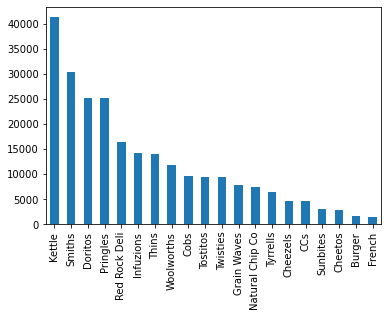

In [43]:
# Check the results look reasonable
transactionData['BRAND'].value_counts().plot(kind='bar')

# Examining customer data

### Do some basic summaries of the dataset, including distributions of any key columns.

In [44]:
customerData.describe

<bound method NDFrame.describe of        LYLTY_CARD_NBR               LIFESTAGE PREMIUM_CUSTOMER
0                1000   YOUNG SINGLES/COUPLES          Premium
1                1002   YOUNG SINGLES/COUPLES       Mainstream
2                1003          YOUNG FAMILIES           Budget
3                1004   OLDER SINGLES/COUPLES       Mainstream
4                1005  MIDAGE SINGLES/COUPLES       Mainstream
...               ...                     ...              ...
72632         2370651  MIDAGE SINGLES/COUPLES       Mainstream
72633         2370701          YOUNG FAMILIES       Mainstream
72634         2370751          YOUNG FAMILIES          Premium
72635         2370961          OLDER FAMILIES           Budget
72636         2373711   YOUNG SINGLES/COUPLES       Mainstream

[72637 rows x 3 columns]>

In [45]:
customerData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


## Merge transaction data to customer data

In [46]:
mergeData = pd.merge(transactionData, customerData, how='left', on='LYLTY_CARD_NBR')
mergeData

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,Natural Chip Co,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,CCs,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,Smiths,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,Smiths,MIDAGE SINGLES/COUPLES,Budget
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,Kettle,MIDAGE SINGLES/COUPLES,Budget
...,...,...,...,...,...,...,...,...,...,...,...
246735,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,Kettle,YOUNG SINGLES/COUPLES,Premium
246736,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,Tostitos,YOUNG SINGLES/COUPLES,Premium
246737,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,Doritos,YOUNG SINGLES/COUPLES,Premium
246738,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,Doritos,YOUNG SINGLES/COUPLES,Premium


In [47]:
mergeData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 246740 entries, 0 to 246739
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   DATE              246740 non-null  datetime64[ns]
 1   STORE_NBR         246740 non-null  int64         
 2   LYLTY_CARD_NBR    246740 non-null  int64         
 3   TXN_ID            246740 non-null  int64         
 4   PROD_NBR          246740 non-null  int64         
 5   PROD_NAME         246740 non-null  object        
 6   PROD_QTY          246740 non-null  int64         
 7   TOT_SALES         246740 non-null  float64       
 8   BRAND             246740 non-null  object        
 9   LIFESTAGE         246740 non-null  object        
 10  PREMIUM_CUSTOMER  246740 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(5), object(4)
memory usage: 22.6+ MB


In [48]:
mergeData.isnull().sum()

DATE                0
STORE_NBR           0
LYLTY_CARD_NBR      0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
BRAND               0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

### There are no nulls. All our customers in the transaction data has been accounted for in the customer dataset.

In [49]:
#save file for task 2
mergeData.to_csv('QVI_data.csv')

## Data exploration is now complete! Let's start data analysis!
- Who spends the most on chips (total sales), describing customers by lifestage and how premium their general purchasing behaviour is
- How many customers are in each segment
- How many chips are bought per customer by segment
- What's the average chip price by customer segment
1. calculating total sales by LIFESTAGE and PREMIUM_CUSTOMER and plotting the split by these segments to describe which customer segment contribute most to chip sales.

In [50]:
# Total sales by LIFESTAGE and PREMIUM_CUSTOMER
merge_data_sum = mergeData.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].agg(['sum', 'mean']).sort_values(by='sum', ascending=False)
merge_data_sum.sort_values(ascending=False, by="mean")

,,sum,mean
LIFESTAGE,PREMIUM_CUSTOMER,,
MIDAGE SINGLES/COUPLES,Mainstream,84734.25,7.637156
YOUNG SINGLES/COUPLES,Mainstream,147582.20,7.551279
RETIREES,Premium,91296.65,7.461315
OLDER SINGLES/COUPLES,Premium,123537.55,7.459997
RETIREES,Budget,105916.30,7.445786
OLDER SINGLES/COUPLES,Budget,127833.60,7.444305
NEW FAMILIES,Mainstream,15979.70,7.313364
OLDER SINGLES/COUPLES,Mainstream,124648.50,7.306049
YOUNG FAMILIES,Budget,129717.95,7.302705


<AxesSubplot:ylabel='LIFESTAGE,PREMIUM_CUSTOMER'>

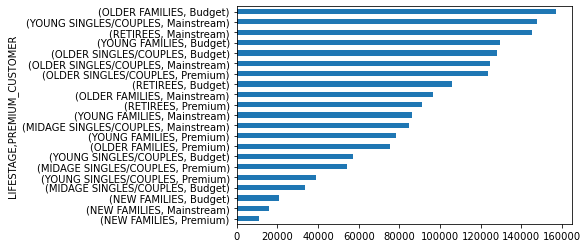

In [51]:
# plot 
merge_data_sum['sum'].sort_values().plot(kind='barh') #TODO combine plots by subplot

Sales are coming mainly from
1. Older families - Budget
2. Young singles/couples - Mainstream
3. Retirees - Mainstream

<AxesSubplot:ylabel='LIFESTAGE'>

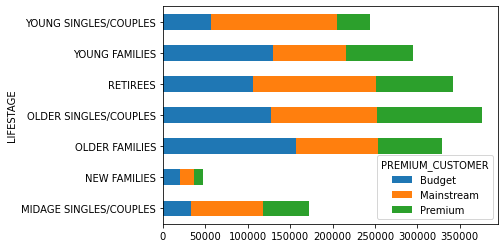

In [52]:
# plot by group LIFESTAGE and PREMIUM_CUSTOMER (bar chart)
merge_data_sum['sum'].unstack().plot(kind='barh', stacked=True)

In [53]:
# number of customers by lifestage and premium_customer
unique_customer = mergeData.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['LYLTY_CARD_NBR'].nunique().sort_values(ascending=False).to_frame()
unique_customer

LYLTY_CARD_NBR
LIFESTAGE              PREMIUM_CUSTOMER                
YOUNG SINGLES/COUPLES  Mainstream                  7917
RETIREES               Mainstream                  6358
OLDER SINGLES/COUPLES  Mainstream                  4858
                       Budget                      4849
                       Premium                     4682
OLDER FAMILIES         Budget                      4611
RETIREES               Budget                      4385
YOUNG FAMILIES         Budget                      3953
RETIREES               Premium                     3812
YOUNG SINGLES/COUPLES  Budget                      3647
MIDAGE SINGLES/COUPLES Mainstream                  3298
OLDER FAMILIES         Mainstream                  2788
YOUNG FAMILIES         Mainstream                  2685
YOUNG SINGLES/COUPLES  Premium                     2480
YOUNG FAMILIES         Premium                     2398
MIDAGE SINGLES/COUPLES Premium                     2369
OLDER FAMILIES         Premium                     2231
MIDAGE SINGLES/COUPLES Budget                      1474
NEW FAMILIES           Budget                      1087
                       Mainstream                   830
                       Premium                      575

There are more "Mainstream - young singles/couples" and "Mainstream - retirees" who buy chips. This contributes to there being more sales to these customer segments but this is not a major driver for the "Older families - Budget segment".

<AxesSubplot:ylabel='LIFESTAGE,PREMIUM_CUSTOMER'>

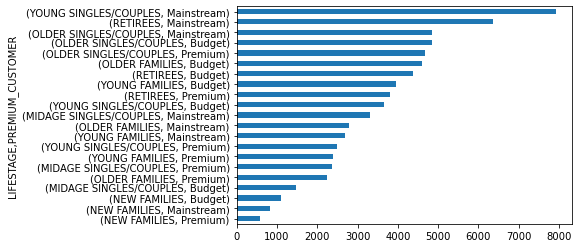

In [54]:
# plot
unique_customer['LYLTY_CARD_NBR'].sort_values().plot(kind='barh') #TODO combine plots by subplot

<AxesSubplot:ylabel='LIFESTAGE'>

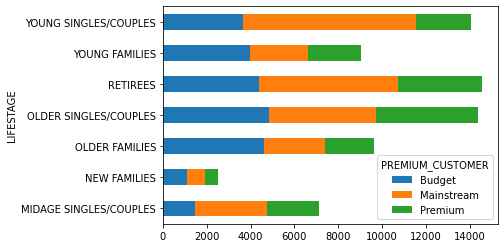

In [55]:
# plot stacked bar chart
unique_customer['LYLTY_CARD_NBR'].unstack().plot(kind='barh', stacked=True)

Higher sales may also be driven by more units of chips being bought per customer.

In [56]:
#Average number of units per customer by LIFESTAGE and PREMIUM_CUSTOMER
avg_unit_customer = mergeData.groupby(['LYLTY_CARD_NBR','LIFESTAGE', 'PREMIUM_CUSTOMER']).count() #frequency of consumption from each customer 
avg_unit_customer = avg_unit_customer.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"]).agg(["mean", "count"])
avg_unit_customer['DATE'].sort_values(ascending=False, by="mean")

mean  count
LIFESTAGE              PREMIUM_CUSTOMER                 
OLDER FAMILIES         Mainstream        4.749283   2788
                       Budget            4.665799   4611
                       Premium           4.662931   2231
YOUNG FAMILIES         Premium           4.497081   2398
                       Budget            4.493549   3953
                       Mainstream        4.449534   2685
OLDER SINGLES/COUPLES  Budget            3.541349   4849
                       Premium           3.536950   4682
                       Mainstream        3.511939   4858
MIDAGE SINGLES/COUPLES Mainstream        3.364160   3298
RETIREES               Budget            3.244014   4385
MIDAGE SINGLES/COUPLES Premium           3.213170   2369
RETIREES               Premium           3.209864   3812
MIDAGE SINGLES/COUPLES Budget            3.182497   1474
RETIREES               Mainstream        3.140925   6358
NEW FAMILIES           Mainstream        2.632530    830
                       Budget            2.597976   1087
                       Premium           2.587826    575
YOUNG SINGLES/COUPLES  Mainstream        2.468612   7917
                       Premium           2.359677   2480
                       Budget            2.350699   3647

1. Older families - budget: buy frequently -> higher TOT_SALES
2. Older families and young families in general buy more chips per customer
3. "Mainstream" "midage singles/couples" and "young singles/couples" are more willing to pay more per packet of chips compared to their "budget" and "premium" counterparts.
4. As the difference in average price per unit isn't large, we can check if this difference is statistically different.

## Perform an independent t-test between mainstream vs premium and budget "midage" and "young" singles/couples
- mainstream
- premium + budget
- midage singles and couples + young singles and couples
- Perform a t-test to see if the difference is significant
- The t-test results in a p-value of XXXXXXX, i.e. the unit price for mainstream, young and mid-age singles and couples [ARE / ARE NOT] significantly higher than that of budget or premium, young and midage singles and couples.

In [57]:
# t-test
mainstream = mergeData["PREMIUM_CUSTOMER"] == "Mainstream"
midage_young = (mergeData["LIFESTAGE"] == "MIDAGE SINGLES/COUPLES") | (mergeData["LIFESTAGE"] == "YOUNG SINGLES/COUPLES")
budget_premium = (mergeData["PREMIUM_CUSTOMER"] == "Budget") | (mergeData["PREMIUM_CUSTOMER"] == "Premium")

a = mergeData[midage_young & mainstream]["TOT_SALES"]
b = mergeData[midage_young & budget_premium]["TOT_SALES"]
stat, pval = stats.ttest_ind(a.values, b.values, equal_var=False)

In [58]:
print(pval)

1.834645908180742e-237


p-value is close to 0, difference.

##### Deep dive into Mainstream, young singles/couples 
let's find out if they tend to buy a particular brand of chips

In [59]:
mergeData.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"])["BRAND"].agg(pd.Series.mode)
#Use groupby, GroupBy.agg, and apply the pd.Series.mode function to each group

LIFESTAGE               PREMIUM_CUSTOMER
MIDAGE SINGLES/COUPLES  Budget              Kettle
                        Mainstream          Kettle
                        Premium             Kettle
NEW FAMILIES            Budget              Kettle
                        Mainstream          Kettle
                        Premium             Kettle
OLDER FAMILIES          Budget              Kettle
                        Mainstream          Kettle
                        Premium             Kettle
OLDER SINGLES/COUPLES   Budget              Kettle
                        Mainstream          Kettle
                        Premium             Kettle
RETIREES                Budget              Kettle
                        Mainstream          Kettle
                        Premium             Kettle
YOUNG FAMILIES          Budget              Kettle
                        Mainstream          Kettle
                        Premium             Kettle
YOUNG SINGLES/COUPLES   Budget           

In [60]:
midage=mergeData[(mergeData['PREMIUM_CUSTOMER']=='Mainstream') & (mergeData['LIFESTAGE']=='MIDAGE SINGLES/COUPLES')]
young=mergeData[(mergeData['PREMIUM_CUSTOMER']=='Mainstream') & (mergeData['LIFESTAGE']=='YOUNG SINGLES/COUPLES')]

In [61]:
midage['BRAND'].value_counts().head(5)

Kettle       2136
Smiths       1276
Doritos      1210
Pringles     1159
Infuzions     679
Name: BRAND, dtype: int64

In [62]:
young['BRAND'].value_counts().head(5)

Kettle       3844
Doritos      2379
Pringles     2315
Smiths       1921
Infuzions    1250
Name: BRAND, dtype: int64

They don't have significant difference on brand preferences among Midage and Young.

## Affinity analysis or a-priori analysis ***

In [63]:
temp = mergeData.reset_index().rename(columns = {"index": "transaction"})
temp["Segment"] = mergeData.reset_index()["LIFESTAGE"] + ' - ' + temp['PREMIUM_CUSTOMER']
segment_brand_encode = pd.concat([pd.get_dummies(temp["Segment"]), pd.get_dummies(temp["BRAND"])], axis=1)

In [64]:
frequent_sets = apriori(segment_brand_encode, min_support=0.001, use_colnames=True)
rules = association_rules(frequent_sets, metric="lift", min_threshold=1)

In [65]:
set_temp = temp["Segment"].unique()
rules[rules["antecedents"].apply(lambda x: list(x)).apply(lambda x: x in set_temp)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(MIDAGE SINGLES/COUPLES - Budget),(Infuzions),0.019012,0.057555,0.001139,0.059902,1.040786,0.000045,1.002497
2,(MIDAGE SINGLES/COUPLES - Budget),(Red Rock Deli),0.019012,0.066147,0.001354,0.071200,1.076400,0.000096,1.005441
4,(MIDAGE SINGLES/COUPLES - Budget),(Smiths),0.019012,0.123016,0.002395,0.125986,1.024142,0.000056,1.003398
6,(MIDAGE SINGLES/COUPLES - Budget),(Thins),0.019012,0.057044,0.001090,0.057344,1.005259,0.000006,1.000318
8,(MIDAGE SINGLES/COUPLES - Budget),(Woolworths),0.019012,0.047970,0.001058,0.055638,1.159871,0.000146,1.008121
...,...,...,...,...,...,...,...,...,...
249,(YOUNG SINGLES/COUPLES - Mainstream),(Twisties),0.079209,0.038316,0.003648,0.046050,1.201858,0.000613,1.008108
251,(YOUNG SINGLES/COUPLES - Mainstream),(Tyrrells),0.079209,0.026108,0.002509,0.031672,1.213098,0.000441,1.005746
252,(YOUNG SINGLES/COUPLES - Premium),(Red Rock Deli),0.023717,0.066147,0.001840,0.077580,1.172855,0.000271,1.012395
255,(YOUNG SINGLES/COUPLES - Premium),(Smiths),0.023717,0.123016,0.003190,0.134484,1.093222,0.000272,1.013250


## Find out if our target segment tends to buy larger packs of chips.

In [66]:
pd.set_option('display.max_rows', 21)

========== YOUNG SINGLES/COUPLES - Premium ==========
134.0     653
150.0     857
175.0    1382
Name: Pack_Size, dtype: int64


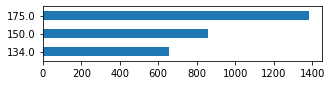

========== YOUNG SINGLES/COUPLES - Budget ==========
134.0     737
150.0    1261
175.0    2114
Name: Pack_Size, dtype: int64


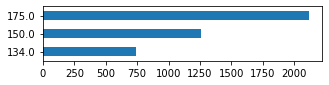

========== YOUNG SINGLES/COUPLES - Mainstream ==========
134.0    1807
150.0    2846
175.0    4847
Name: Pack_Size, dtype: int64


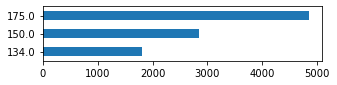

========== MIDAGE SINGLES/COUPLES - Premium ==========
134.0     735
150.0    1061
175.0    1858
Name: Pack_Size, dtype: int64


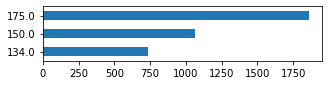

========== MIDAGE SINGLES/COUPLES - Budget ==========
134.0     423
150.0     704
175.0    1170
Name: Pack_Size, dtype: int64


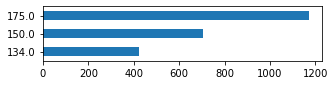

========== MIDAGE SINGLES/COUPLES - Mainstream ==========
134.0    1079
150.0    1607
175.0    2738
Name: Pack_Size, dtype: int64


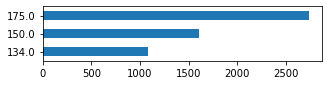

========== NEW FAMILIES - Premium ==========
134.0    142
150.0    235
175.0    367
Name: Pack_Size, dtype: int64


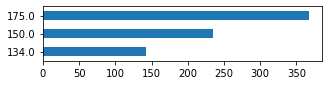

========== NEW FAMILIES - Budget ==========
134.0    268
150.0    415
175.0    721
Name: Pack_Size, dtype: int64


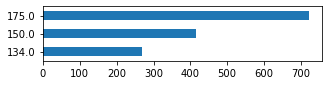

========== NEW FAMILIES - Mainstream ==========
110.0    218
150.0    305
175.0    557
Name: Pack_Size, dtype: int64


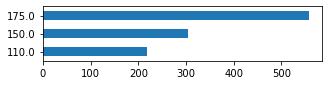

========== OLDER FAMILIES - Premium ==========
134.0     937
150.0    1514
175.0    2564
Name: Pack_Size, dtype: int64


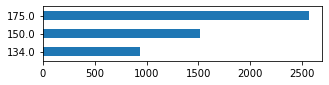

========== OLDER FAMILIES - Budget ==========
134.0    1894
150.0    3140
175.0    5226
Name: Pack_Size, dtype: int64


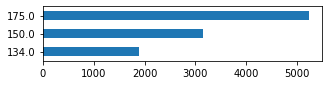

========== OLDER FAMILIES - Mainstream ==========
134.0    1116
150.0    1953
175.0    3243
Name: Pack_Size, dtype: int64


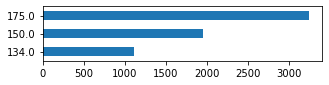

========== OLDER SINGLES/COUPLES - Premium ==========
134.0    1588
150.0    2483
175.0    4057
Name: Pack_Size, dtype: int64


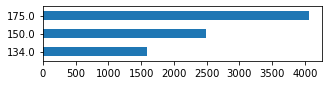

========== OLDER SINGLES/COUPLES - Budget ==========
134.0    1677
150.0    2566
175.0    4234
Name: Pack_Size, dtype: int64


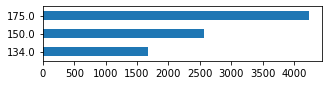

========== OLDER SINGLES/COUPLES - Mainstream ==========
134.0    1645
150.0    2440
175.0    4113
Name: Pack_Size, dtype: int64


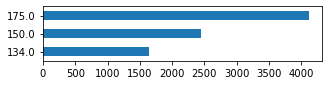

========== RETIREES - Premium ==========
134.0    1202
150.0    1806
175.0    3003
Name: Pack_Size, dtype: int64


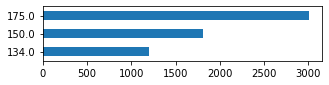

========== RETIREES - Budget ==========
134.0    1436
150.0    2126
175.0    3540
Name: Pack_Size, dtype: int64


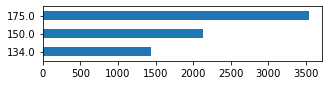

========== RETIREES - Mainstream ==========
134.0    1962
150.0    2949
175.0    4839
Name: Pack_Size, dtype: int64


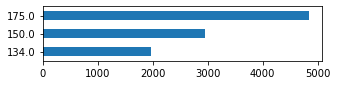

========== YOUNG FAMILIES - Premium ==========
134.0     984
150.0    1596
175.0    2618
Name: Pack_Size, dtype: int64


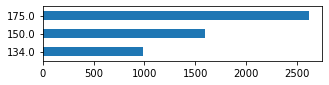

========== YOUNG FAMILIES - Budget ==========
134.0    1722
150.0    2509
175.0    4446
Name: Pack_Size, dtype: int64


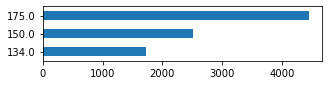

========== YOUNG FAMILIES - Mainstream ==========
134.0    1032
150.0    1762
175.0    2948
Name: Pack_Size, dtype: int64


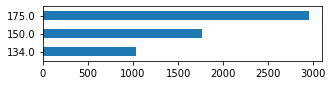

In [67]:
merged_pack = pd.concat([mergeData, pack_sizes.rename("Pack_Size")], axis=1)

for stage in mergeData["LIFESTAGE"].unique():
    for prem in mergeData["PREMIUM_CUSTOMER"].unique():
        print('==========',stage, '-', prem,'==========')
        summary = merged_pack[(merged_pack["LIFESTAGE"] == stage) & (merged_pack["PREMIUM_CUSTOMER"] == prem)]["Pack_Size"].value_counts().head(3).sort_index()
        print(summary)
        plt.figure()
        summary.plot.barh(figsize=(5,1))
        plt.show()

In [68]:
(temp.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"])["PROD_QTY"].sum() / temp.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"])["LYLTY_CARD_NBR"].nunique()).sort_values(ascending=False)

LIFESTAGE               PREMIUM_CUSTOMER
OLDER FAMILIES          Mainstream          9.255380
                        Budget              9.076773
                        Premium             9.071717
YOUNG FAMILIES          Budget              8.722995
                        Premium             8.716013
                        Mainstream          8.638361
OLDER SINGLES/COUPLES   Budget              6.781398
                        Premium             6.769543
                        Mainstream          6.712021
MIDAGE SINGLES/COUPLES  Mainstream          6.432080
RETIREES                Budget              6.141847
                        Premium             6.103358
MIDAGE SINGLES/COUPLES  Premium             6.078514
                        Budget              6.026459
RETIREES                Mainstream          5.925920
NEW FAMILIES            Mainstream          4.891566
                        Budget              4.821527
                        Premium             4.815652
YOUNG

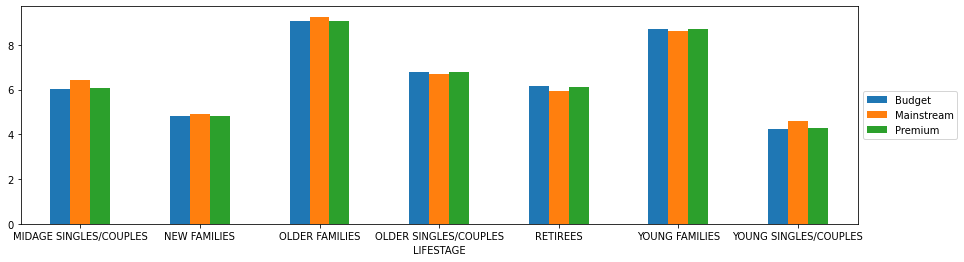

In [69]:
(temp.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"])["PROD_QTY"].sum() / temp.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"])["LYLTY_CARD_NBR"].nunique()).unstack().plot.bar(figsize=(15,4), rot=0)
plt.legend(loc="center left", bbox_to_anchor=(1.0, 0.5))
plt.savefig("Average purchase quantity per segment.png", bbox_inches="tight")

In [70]:
#Average chips price per transaction by segments
temp["Unit_Price"] = temp["TOT_SALES"] / temp["PROD_QTY"]
temp.groupby(["Segment"]).mean()["Unit_Price"].sort_values(ascending=False)

Segment
YOUNG SINGLES/COUPLES - Mainstream     4.065642
MIDAGE SINGLES/COUPLES - Mainstream    3.994241
RETIREES - Budget                      3.924404
RETIREES - Premium                     3.920942
NEW FAMILIES - Budget                  3.917688
NEW FAMILIES - Mainstream              3.916133
OLDER SINGLES/COUPLES - Premium        3.893182
OLDER SINGLES/COUPLES - Budget         3.882096
NEW FAMILIES - Premium                 3.872110
RETIREES - Mainstream                  3.844294
OLDER SINGLES/COUPLES - Mainstream     3.814665
MIDAGE SINGLES/COUPLES - Premium       3.770698
YOUNG FAMILIES - Premium               3.762150
YOUNG FAMILIES - Budget                3.760737
OLDER FAMILIES - Budget                3.745340
MIDAGE SINGLES/COUPLES - Budget        3.743328
OLDER FAMILIES - Mainstream            3.737077
YOUNG FAMILIES - Mainstream            3.724533
OLDER FAMILIES - Premium               3.717000
YOUNG SINGLES/COUPLES - Premium        3.665414
YOUNG SINGLES/COUPLES - Budget  

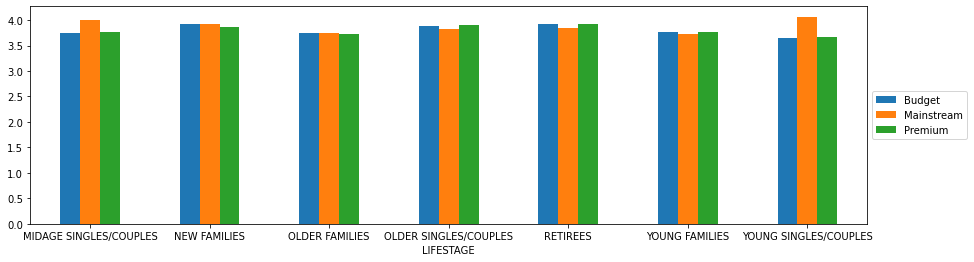

In [71]:
temp.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"]).mean()["Unit_Price"].unstack().plot.bar(figsize=(15,4), rot=0)
plt.legend(loc="center left", bbox_to_anchor=(1,0.5))

In [ ]:
.........